# Travel Package Purchase Prediction

## Problem Statement

### Background and Context

             A Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

        A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

    One of the ways to expand the customer base is to introduce a new offering of packages.

    Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

    However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

        The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

        However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

        You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

 ### Objective

    To predict which customer is more likely to purchase the newly introduced travel package.

## Data Description

### Customer details:

    - CustomerID: Unique customer ID
    - ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - Age: Age of customer
    - TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    - CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
    - Occupation: Occupation of customer
    - Gender: Gender of customer
    - NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    - PreferredPropertyStar: Preferred hotel property rating by customer
    - MaritalStatus: Marital status of customer
    - NumberOfTrips: Average number of trips in a year by customer
    - Passport: The customer has a passport or not (0: No, 1: Yes)
    - OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    - NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    - Designation: Designation of the customer in the current organization
    - MonthlyIncome: Gross monthly income of the customer
    - Customer interaction data: 

    - PitchSatisfactionScore: Sales pitch satisfaction score
    - ProductPitched: Product pitched by the salesperson
    - NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    - DurationOfPitch: Duration of the pitch by a salesperson to the customer

# import all packages into python notebook 

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

#  Load Xlsx file into a data frame

In [2]:
df = pd.read_excel("Tourism.xlsx", sheet_name='Tourism')

# Read Xlsx file and see the sheets and data inside it 

In [3]:
df_excel=pd.ExcelFile("Tourism.xlsx")

In [4]:
df_excel.sheet_names

['Data Dict', 'Tourism']

In [5]:
df_excel.parse(sheet_name = 'Tourism')

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Exe

 #### Check data types and number of non-null values for each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that there are total of 19 columns and 4655 rows in the dataset.
- All columns' data type is either integer or float few other column which are  the object type.
- The number of non-null values of each column is not  equal to the number of total rows in the dataset i.e. we do have some
of  the null value. We can further work on this  to improve data if possible.


#### Randonmly Checking unique values in a few  coloumns

In [7]:
df.Designation.unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [8]:
df['ProdTaken'].unique()

array([1, 0])

# print columns by data Type 

In [9]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{int64: ['CustomerID', 'ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'Passport', 'PitchSatisfactionScore', 'OwnCar'], float64: ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'], object: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']}

# Let us get our interested data type  : Object 

# print unique value in each column  

In [10]:
uniqueValues = df.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

Count of unique value sin each column :
CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64


In [11]:
df.select_dtypes(include=['object']).columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

# print unique values of each column so we can understand and act on those 

In [12]:
# copying data to another varaible to avoid any changes to original data
data=df.copy()

In [13]:
def uniqueColumnValues(df):
 for col in df.select_dtypes(include=['object']).columns:
    print("---- %s ---",col)
    print("now printing unique valuess")
    print(df[col].unique())
    print(df[col].value_counts())
    print("---- %s ---")

uniqueColumnValues(data)

---- %s --- TypeofContact
now printing unique valuess
['Self Enquiry' 'Company Invited' nan]
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
---- %s ---
---- %s --- Occupation
now printing unique valuess
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
---- %s ---
---- %s --- Gender
now printing unique valuess
['Female' 'Male' 'Fe Male']
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
---- %s ---
---- %s --- ProductPitched
now printing unique valuess
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
---- %s ---
---- %s --- MaritalStatus
now printing unique valuess
['Single' 'Divorced' 'Married' 'Unmarried']
Married      2340
Divorced      950
Single     

- The number of observations TypeofContact shows we have significant null, it also means we need to come up with a filler 
- As expected, ProductPitched we have 2 categories which are most preferred, basic and deluxe ones show that , they are most preferred among customers.
- Male travelres are more in the dataset than female.
- Salaried and Small business people seem to spend time on travelling than others
- Married people travel more than other categories

 # If there are any null values in data set

In [14]:
df.isnull().values.any()

True

 #  Print columns with null values in the data set

In [15]:
df.columns[df.isnull().any()]

Index(['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',
       'MonthlyIncome'],
      dtype='object')

In [16]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# Function to help understand more on missing Data 

In [17]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 20 columns and 4888 Rows.
There are 8 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
DurationOfPitch                     0             251                5.1   
MonthlyIncome                       0             233                4.8   
Age                                 0             226                4.6   
NumberOfTrips                       0             140                2.9   
NumberOfChildrenVisiting         1082              66                1.4   
NumberOfFollowups                   0              45                0.9   
PreferredPropertyStar               0              26                0.5   
TypeofContact                       0              25                0.5   

                          Total Zero Missing Values  \
DurationOfPitch                                 251   
MonthlyIncome                                   233   
Age                                             226   
NumberOfTrips                                   140   
NumberOfChildrenVisiting                       1148   
NumberOfFollowups                                45   
PreferredPropertyStar                            26   
TypeofContact                                    25   

                          % Total Zero Missing Values Data Type  
DurationOfPitch                                   5.1   float64  
MonthlyIncome                                     4.8   float64  
Age                                               4.6   float64  
NumberOfTrips                                     2.9   float64  
NumberOfChildrenVisiting                         23.5   float64  
NumberOfFollowups                                 0.9   float64  
PreferredPropertyStar                             0.5   float64  
TypeofContact                                     0.5    object

# Get Mean, median and mode of the dataset 

In [18]:
def getMissingMetrics(df):
  #for col in pd.isnull(df).columns:
    print("---- %s ---")
    print("\n----------- Calculate Mean -----------\n")
    print(df.mean())
    print("\n----------- Calculate Median -----------\n")
    print(df.median())
    print("\n----------- Calculate Mode -----------\n")
    print(df.mode())
    print("---- %s ---")
    
getMissingMetrics(data)

---- %s ---

----------- Calculate Mean -----------

CustomerID                  202443.500000
ProdTaken                        0.188216
Age                             37.622265
CityTier                         1.654255
DurationOfPitch                 15.490835
NumberOfPersonVisiting           2.905074
NumberOfFollowups                3.708445
PreferredPropertyStar            3.581037
NumberOfTrips                    3.236521
Passport                         0.290917
PitchSatisfactionScore           3.078151
OwnCar                           0.620295
NumberOfChildrenVisiting         1.187267
MonthlyIncome                23619.853491
dtype: float64

----------- Calculate Median -----------

CustomerID                  202443.5
ProdTaken                        0.0
Age                             36.0
CityTier                         1.0
DurationOfPitch                 13.0
NumberOfPersonVisiting           3.0
NumberOfFollowups                4.0
PreferredPropertyStar            3.0
Numbe

# Explore the dataset more to see whats going on 
### 1. If children are not specified then they are taken as 0
     2. Missing Age is matched with average age.
     3. Missing Rating is taken with average rating. 
     4. Montly income is also replaced with average.
     5. Preferred rating is also replaced by average.
     

In [19]:
# explore the dataset more to see whats going on 

#Create a function to do value counts on each column 

def printValueCounts(df):
  for col in df.columns:
    print("---- %s ---")
    print(df[col].value_counts())
    
printValueCounts(df)

#plData.value_counts()

---- %s ---
204800    1
204253    1
200167    1
204261    1
202212    1
         ..
203522    1
201471    1
203518    1
201467    1
200702    1
Name: CustomerID, Length: 4888, dtype: int64
---- %s ---
0    3968
1     920
Name: ProdTaken, dtype: int64
---- %s ---
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
---- %s ---
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
---- %s ---
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
---- %s ---
9.0     

# Replace values with average or mean in the data frame

In [20]:
columnList = ["Age", "PreferredPropertyStar", "MonthlyIncome","DurationOfPitch"]

def dataFiller(df,columnsList):
  for col in columnList:
     replaceValue = df[col].mean()
     df[col] = df[col].fillna(replaceValue)
        
        
dataFiller(data,columnList)


# Replace null value with 0 on children as null value in dataset

In [21]:
columnList = ["NumberOfChildrenVisiting"]

def replaceMissingValueWithZero(df, columnList):
    for col in columnList:
        df[col] = df[col].fillna(0)

replaceMissingValueWithZero(data,columnList)

# idea here is to update 0 to  numer of follow ups if they already took the product

In [22]:
data['NumberOfFollowups'] = data.apply(lambda x: 0 if x['ProdTaken'] == 1 and x['NumberOfFollowups'] == '' else x['NumberOfFollowups'], axis=1)


# now we also fill 0 to those who did not take the product and not call back on it 

In [23]:
data.NumberOfFollowups= data.NumberOfFollowups.fillna(0)

#  if product is take once then we can say number of trips as 1  else we update missing data to

In [24]:
data['NumberOfTrips'] = data.apply(lambda x: 1 if x['ProdTaken'] == 1 and x['NumberOfTrips'] == '' else x['NumberOfTrips'], axis=1)


# now update the rest of NumberOfTrips data to 0

In [25]:
data.NumberOfTrips= data.NumberOfTrips.fillna(0)

In [26]:
data.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

# they can also find for a freind or gift to some one else.
# so we add new cetorgy Gift or External factor


In [27]:
data.TypeofContact= data.TypeofContact.fillna('Gift')

In [28]:
data.columns[data.isnull().any()]

Index([], dtype='object')

# now that the data if full we can work on category variables 

# address category variables 
###   'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',   'MaritalStatus', 'Designation'],

In [29]:
data.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited', 'Gift'], dtype=object)

### prelace TypeofContact category with integers so we can use them for better analysis 

In [30]:
data['TypeofContact'] = data['TypeofContact'].replace({'Self Enquiry': 1, 'Company Invited': 2, 'Gift':3})


### Occupation: column transformation

In [31]:
data.Occupation.unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [32]:
data['Occupation'] =data['Occupation'].replace({'Salaried': 1, 'Free Lancer': 2, 'Small Business':3, 'Large Business':4})


# Replace Gender with numerical equalent 

In [33]:
data.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [34]:
data['Gender'] = data['Gender'].replace({'Female': 1, 'Male': 2, 'Fe Male':1})


#  Replace ProductPitched' with numerical equalent 

In [35]:
data.ProductPitched.unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [36]:
data['ProductPitched'] =data['ProductPitched'].replace({'Deluxe': 1, 'Basic': 2, 'Standard':3, 'Super Deluxe':4,'King':5})


# Replace MaritalStatus with numerical equalent 

In [37]:
data.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [38]:
data['MaritalStatus'] =data['MaritalStatus'].replace({'Single': 1, 'Divorced': 2, 'Married':3, 'Unmarried':4})


#  Replace Designation with numerical equalent 

In [39]:
data.Designation.unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [40]:
data['Designation'] =data['Designation'].replace({'Manager': 1, 'Executive': 2, 'Senior Manager':3, 'AVP':4, 'VP':5})


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   int64  
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   int64  
 7   Gender                    4888 non-null   int64  
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   int64  
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   int64  
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

# We only have numerical data types here and they are ready to get to model

In [42]:
data.Occupation.unique()

array([1, 2, 3, 4])

#### we have 18 variablles to get to the mdoel and get them to work, of which 1 is product taken our target variable

In [43]:
# check for the head of the data frame and see the data 
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [44]:
print('The shape fo the data here is  given by df.shape: is =>',df.shape)

The shape fo the data here is  given by df.shape: is => (4888, 20)


In [45]:
data.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                 4888.0       0.188216     0.390925       0.0   
Age                       4888.0      37.622265     9.098418      18.0   
TypeofContact             4888.0       1.300532     0.469560       1.0   
CityTier                  4888.0       1.654255     0.916583       1.0   
DurationOfPitch           4888.0      15.490835     8.297971       5.0   
Occupation                4888.0       2.119476     1.118901       1.0   
Gender                    4888.0       1.596563     0.490637       1.0   
NumberOfPersonVisiting    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups         4888.0       3.674304     1.058886       0.0   
ProductPitched            4888.0       2.078560     1.097072       1.0   
PreferredPropertyStar     4888.0       3.581037     0.795883       3.0   
MaritalStatus             4888.0       2.570376     0.948197       1.0   
NumberOfTrips             4888.0       3.143822     1.900637       0.0   
Passport                  4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore    4888.0       3.078151     1.365792       1.0   
OwnCar                    4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisiting  4888.0       1.171236     0.862999       0.0   
Designation               4888.0       2.078560     1.097072       1.0   
MonthlyIncome             4888.0   23619.853491  5250.862747    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
ProdTaken                      0.00       0.0       0.00       1.0  
Age                           31.00      37.0      43.00      61.0  
TypeofContact                  1.00       1.0       2.00       3.0  
CityTier                       1.00       1.0       3.00       3.0  
DurationOfPitch                9.00      14.0      19.00     127.0  
Occupation                     1.00       3.0       3.00       4.0  
Gender                         1.00       2.0       2.00       2.0  
NumberOfPersonVisiting         2.00       3.0       3.00       5.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
ProductPitched                 1.00       2.0       3.00       5.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
MaritalStatus                  2.00       3.0       3.00       4.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
Passport                       0.00       0.0       1.00       1.0  
PitchSatisfactionScore         2.00       3.0       4.00       5.0  
OwnCar                         0.00       1.0       1.00       1.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
Designation                    1.00       2.0       3.00       5.0  
MonthlyIncome              20485.00   22655.0   25424.75   98678.0

# Identify Correlation in data

In [46]:
df.corr() # It will show correlation matrix 

CustomerID  ProdTaken       Age  CityTier  \
CustomerID                  1.000000   0.056506  0.032127  0.012975   
ProdTaken                   0.056506   1.000000 -0.147254  0.086852   
Age                         0.032127  -0.147254  1.000000 -0.015625   
CityTier                    0.012975   0.086852 -0.015625  1.000000   
DurationOfPitch             0.064298   0.078257 -0.012063  0.022703   
NumberOfPersonVisiting      0.604013   0.009627  0.011621 -0.001671   
NumberOfFollowups           0.427539   0.112171 -0.002577  0.023652   
PreferredPropertyStar       0.010553   0.099577 -0.010474 -0.009164   
NumberOfTrips               0.224848   0.018898  0.184905 -0.029709   
Passport                    0.007974   0.260844  0.033399  0.001793   
PitchSatisfactionScore     -0.035847   0.051394  0.018510 -0.042160   
OwnCar                      0.003805  -0.011508  0.048654  0.003817   
NumberOfChildrenVisiting    0.511763   0.007421  0.007370  0.000672   
MonthlyIncome               0.276833  -0.130585  0.464869  0.051817   

                          DurationOfPitch  NumberOfPersonVisiting  \
CustomerID                       0.064298                0.604013   
ProdTaken                        0.078257                0.009627   
Age                             -0.012063                0.011621   
CityTier                         0.022703               -0.001671   
DurationOfPitch                  1.000000                0.065141   
NumberOfPersonVisiting           0.065141                1.000000   
NumberOfFollowups                0.009434                0.328569   
PreferredPropertyStar           -0.006637                0.033867   
NumberOfTrips                    0.009715                0.195223   
Passport                         0.033034                0.011177   
PitchSatisfactionScore          -0.002880               -0.019581   
OwnCar                          -0.001626                0.010362   
NumberOfChildrenVisiting         0.031408                0.610621   
MonthlyIncome                   -0.006252                0.195134   

                          NumberOfFollowups  PreferredPropertyStar  \
CustomerID                         0.427539               0.010553   
ProdTaken                          0.112171               0.099577   
Age                               -0.002577              -0.010474   
CityTier                           0.023652              -0.009164   
DurationOfPitch                    0.009434              -0.006637   
NumberOfPersonVisiting             0.328569               0.033867   
NumberOfFollowups                  1.000000              -0.024176   
PreferredPropertyStar             -0.024176               1.000000   
NumberOfTrips                      0.139517               0.012115   
Passport                           0.004970               0.001040   
PitchSatisfactionScore             0.004054              -0.022701   
OwnCar                             0.012112               0.015742   
NumberOfChildrenVisiting           0.286425               0.035798   
MonthlyIncome                      0.176503               0.014289   

                          NumberOfTrips  Passport  PitchSatisfactionScore  \
CustomerID                     0.224848  0.007974               -0.035847   
ProdTaken                      0.018898  0.260844                0.051394   
Age                            0.184905  0.033399                0.018510   
CityTier                      -0.029709  0.001793               -0.042160   
DurationOfPitch                0.009715  0.033034               -0.002880   
NumberOfPersonVisiting         0.195223  0.011177               -0.019581   
NumberOfFollowups              0.139517  0.004970                0.004054   
PreferredPropertyStar          0.012115  0.001040               -0.022701   
NumberOfTrips                  1.000000  0.012949               -0.004378   
Passport                       0.012949  1.000000                0.002926   
PitchSatisfactionScore    

###  The Observations are here 

 1.  Product taken is positively related to follow ups, prefered rating and number of people attending, duratoon of pitch
 2.   Product taken is negatively correlated to age, which means we need to adapt more to help ittch better

# However we want to see correlation in graphical representation so below is function for that


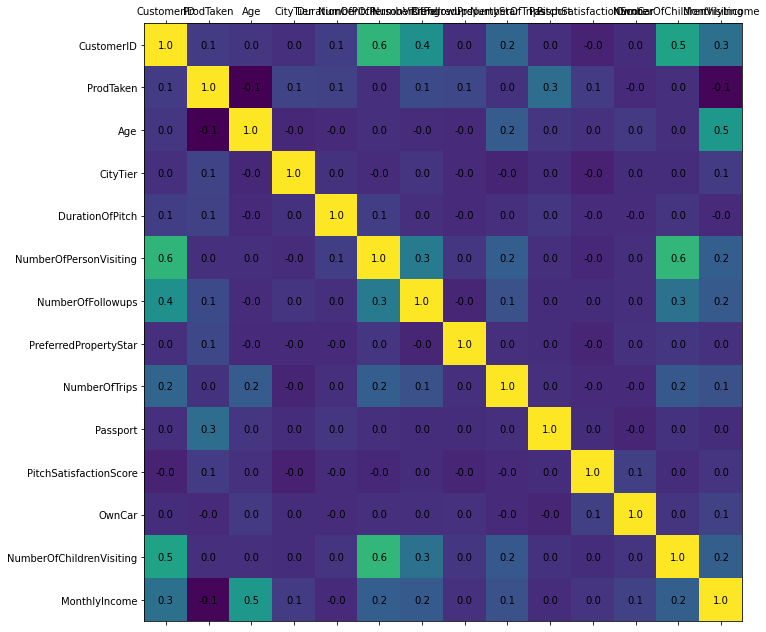

In [47]:
def plot_corr(df, size=11):
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_corr(df)

<AxesSubplot:>

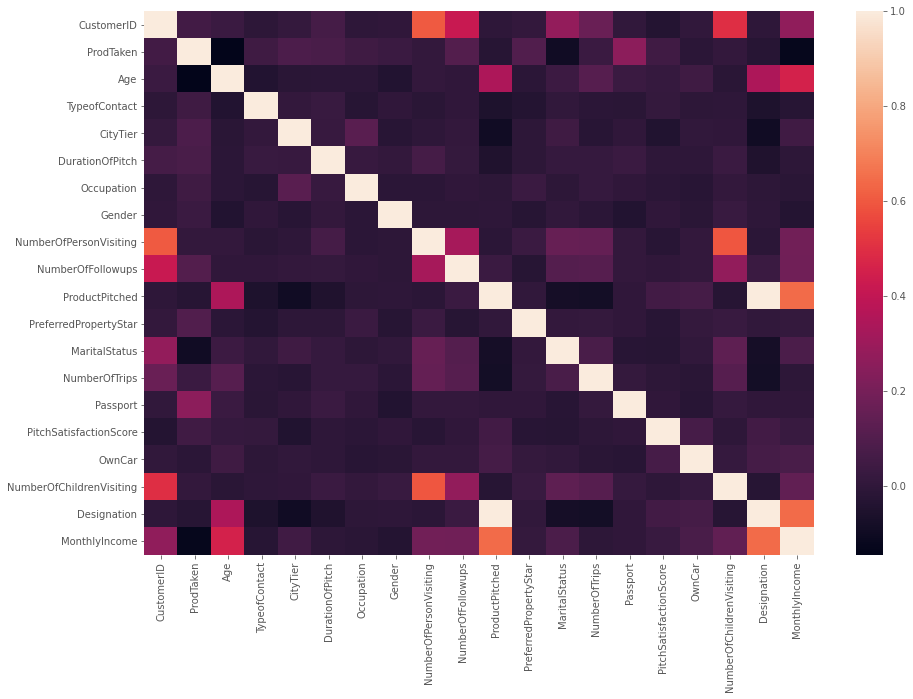

In [48]:
plt.figure(figsize=(15, 10))
plt.style.use('ggplot')
sns.heatmap(data.corr())

# data profile report 

In [49]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 # EDA with custom functions

# UniVariant analysis
. This involves only one variable in the dataset and we can bring in insights from it

#### **Function to create barplots that indicate percentage for each category**

In [50]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

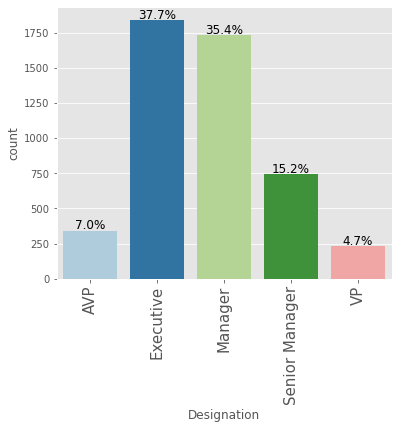

In [51]:
labeled_barplot(df, "Designation",perc=True)

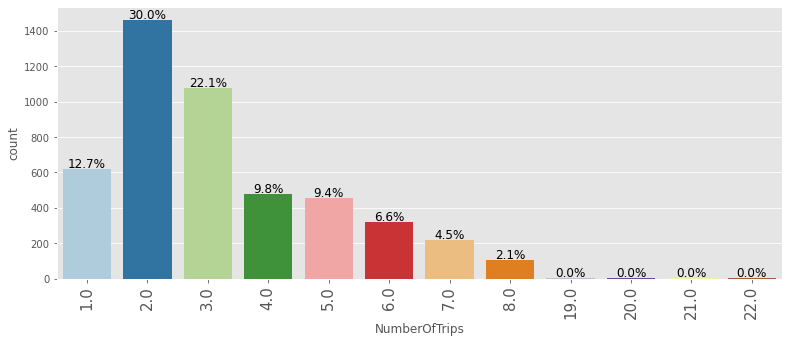

In [52]:
labeled_barplot(df, "NumberOfTrips",perc=True)

###  2.0 trips show that we have got repeated customers and we do need tom  emphasize on that for better marketting

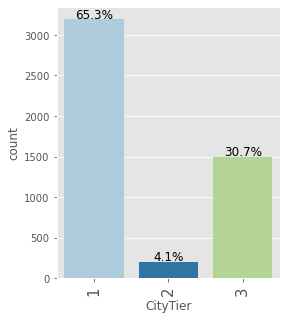

In [53]:
labeled_barplot(df, "CityTier",perc=True)

### This is interesting find that tier 1 and 3 has peple comming to travel more than thier 2 , so we need to focus more on tier 2 to new market 

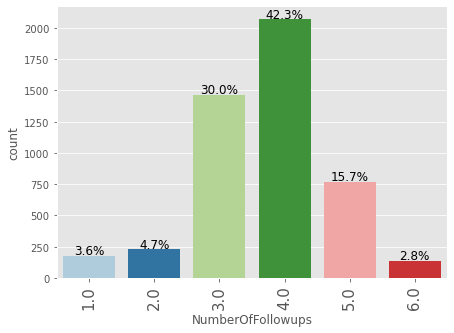

In [54]:
labeled_barplot(df, "NumberOfFollowups",perc=True)

### Follow up in this seems to be with 3,4,5  seems counter productive too. 

### Bivariate analysis

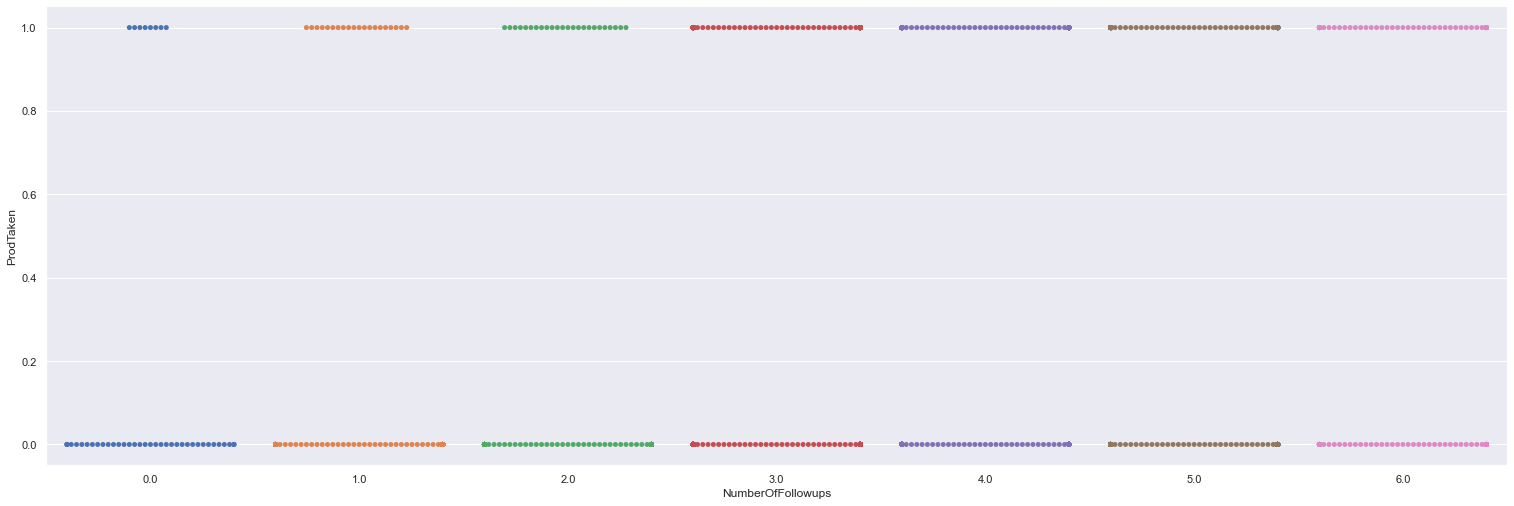

In [55]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="NumberOfFollowups", y="ProdTaken", kind="swarm", data=data, height=7, aspect=3,estimator=np.mean);

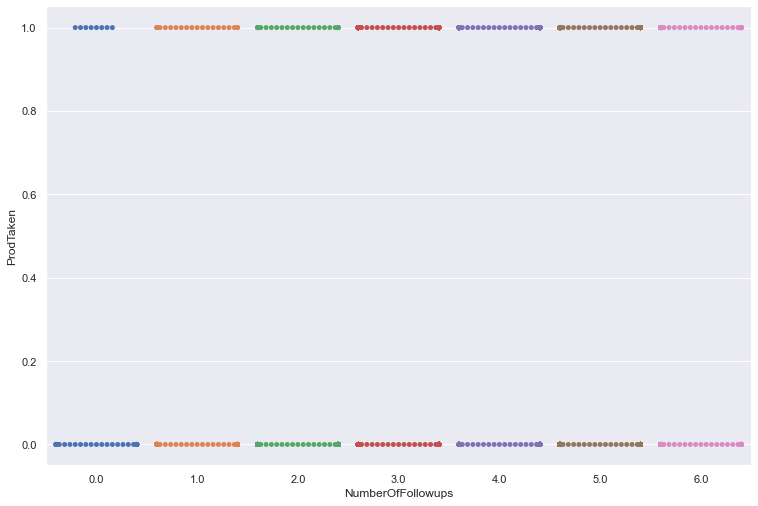

In [56]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="NumberOfFollowups", y="ProdTaken", kind="swarm", data=data, height=7, aspect=1.5, estimator=np.mean);

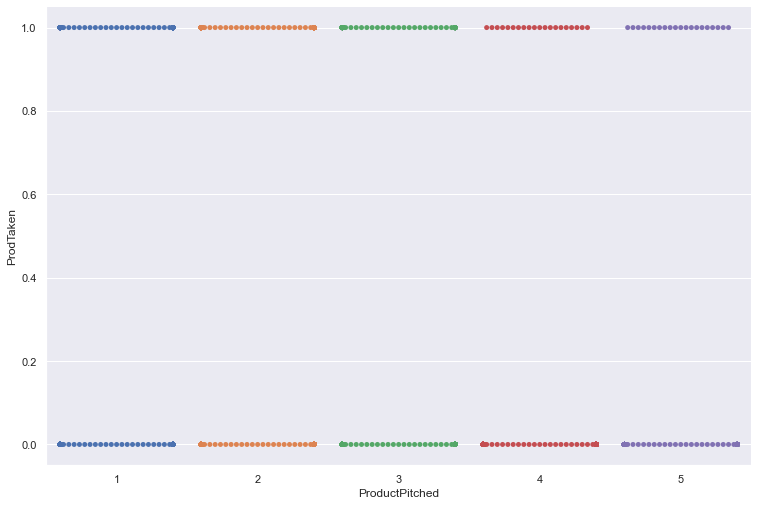

In [57]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="ProductPitched", y="ProdTaken", kind="swarm", data=data, height=7, aspect=1.5, estimator=np.mean);

In [59]:
#sns.catplot(x="hr", y="cnt", data=data, kind='bar', height=7, aspect=1.5, estimator=np.mean);

 #### Executive and Managers  are most of our customers as a percentage 

# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
1. Histogram
2. Box Plot


In [60]:
 #univariate_num_plot(plData.Age)
    #print the plot for all columns in dataset 

def univariate_num_plotForDataFrame(df):
  for col in df.select_dtypes(exclude=['object']).columns:
       df1 = df[col]
       univariate_num_plot(df1)
    

univariate_num_plotForDataFrame(data)

NameError: name 'univariate_num_plot' is not defined

- Age can be interesting observed that max travel inquries are happing between 30 - 50 where people travel actively
- Tier 1 cities seem to dominate the travel 
- Duration of the pitch also shows that if people are determined to travel they get convinced easily. 
- Number of persons visiting also shows interesting picture of 2 and 3 or upto 4 has most visitors gorup 
- Preferred property star also means that people do tend to seem to take decent place to stay is also good. 
- Number of trips show that when people travel once they also seem to travel 2nd time, however 3nd and 4th seem to less. 

- pitch satisfaction score seem to be interesting, we can do futher analysis on is product taken and score to find more details 

**Function to create barplots that indicate percentage for each category**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
sns.pairplot(df,diag_kind='kde')

# overview check for duplicates in the dataset

In [ ]:
df.duplicated().sum()  # checking for duplicate data in dataframe

## observation shows that rows are not duplicate
## CustomerId  is also not needed for our model build, we ccan drop it 

In [ ]:

data.drop(["CustomerID"], axis=1, inplace=True)
data.info()

In [ ]:
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.


def univariate_num_plot(feature, figsize=(10, 8), bins=10):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print(feature.describe())
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        x=feature, kde=False, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        x=feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram


# Heat Map

In [ ]:
plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), 
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* There are both category and numerical variables
* We identified dependent variables, which shows both postive and negative correlation


**Data Cleaning:**


* Customer ID is not needed for our model.
* We have cateogory variables we can replace them with numerals and also find missing values in other columns.
* We need to use mean, median, mode and logic to address missing values which will be below in next steps


**Observations from EDA:**

* `Tier 1 and Tier 3 Cities`: People show more interest in travel. 
* `Age`: Travelers are mostrly between 30 and 50, after that it is negatively correlated.
* `Gender`:  Customer base is both male and female. 
* `Follow Ups`: Follow up seems to be very aggressive, with more than 5 is unnecessary.
* `Designation`: Managers and Executives travel most, so we can give them better and improved addtional services for more revenue


**Actions for data pre-processing:**

* Handle missing data
* Remove customerID
* Calculate mean, median , mode to susbitute missing values


**Actions After data pre-processing:**

* Data replaced with respective values where ever we have null.
* Now data set is full and we do not have any missing values

**Actions Next:**

* Split Data and Build models for comparision 

# Splitting the Data 

###  When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to  ###  use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
###   This is done by setting the stratify parameter to target variable in the train_test_split function.

In [ ]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

. We have 3421 observations in the train set and 1467 observations in the test set.

#### **We will use the same functions, to calculate different metrics and plot the confusion matrix.**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

  #  Decision Tree Model

### Building Models
- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.
            

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [ ]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

In [ ]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

#### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

In [ ]:
make_confusion_matrix(abc,y_test)

#### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

In [ ]:
make_confusion_matrix(gbc,y_test)

**With default parameters:**
- AdaBoost classifier has better test accuracy among these 3 models.
- GB classifier has least test accuracy and test recall.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

In [ ]:
make_confusion_matrix(xgb,y_test)

In [ ]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

In [ ]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

- The Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

In [ ]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

**As compared to the model with default parameters:**

- Test accuracy and test recall have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has not increased by much.
- The model has started to overfit the train data in terms of recall.
- It is better at identifying non-defaulters than identifying defaulters which is the opposite of the result we need.

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

### Insights
- The test accuracy of the model has reduced as compared to the model with default parameters but the recall has increased significantly and the model is able to identify most of the defaulters.
- Decreasing number of false negatives has increased the number of false positives here.
- The tuned model is not overfitting and generalizes well.

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all models

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

### Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

In [ ]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

- The tuned gradient boosting model is the best model here. It has the highest r2 score of approx 95.5% and the lowest RMSE of approx 39 on the test data.
- Gradient boosting, XGBoost, and stacking regressor are the top 3 models. They are all giving a similar performance.

In [ ]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

# Final Observations before we go to recomendataion

### We are dealing with Missing data and here is the detailed report on that 

     1. This results in assumptions and removal of data which could have impacted model observations to some  extent. 
     2. assumptions are made in a most meaningful manner so they could not have impacted any broarder conclusions
     3. If childeren are not specified then they are taken as 0
     4. Missing Age is matched with average age.
     5. Missing Rating is taken with average rating. 


In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)